In this notebook i am going to analyze texts of customer reviews for their food purchases from amazon.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\Arash\\DataScience Projects\\Amazon Fine Food Reviews'

In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [4]:
%qtconsole

In [25]:
data = pd.read_csv("Reviews.csv")

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
data.Score.mean()

4.183198640523243

(array([  52268.,       0.,   29769.,       0.,       0.,   42640.,
              0.,   80655.,       0.,  363122.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

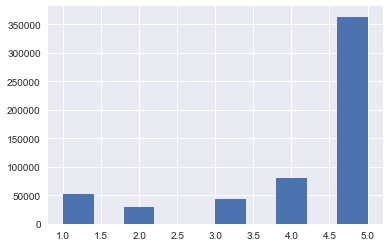

In [9]:
plt.hist(data.Score)

So most of our scores are above average (3) and are good which is surprising (most of them are 5/5 actually)

In [10]:
low_count_percent = data[data.Score < 3].shape[0] / data.shape[0] * 100
high_count_percent = data[data.Score > 3].shape[0] / data.shape[0] * 100
print("Lower than 3 score: " , low_count_percent , "% ", " Higher than 3 score: ", high_count_percent , "% ")

Lower than 3 score:  14.431598686964996 %   Higher than 3 score:  78.06735461444549 % 


So our data is kinda unbalanced because most of ratings are above 3.

In [28]:
#NaN_columns = [column for column in data.columns if data[column].isnull().sum() != 0 and column != 'SalePrice']
text_lengths = [len(row.Text) for idx,row in data.iterrows()]
text_lengths = pd.DataFrame(text_lengths)

In [29]:
data['TextLength'] = text_lengths
del text_lengths

In [13]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


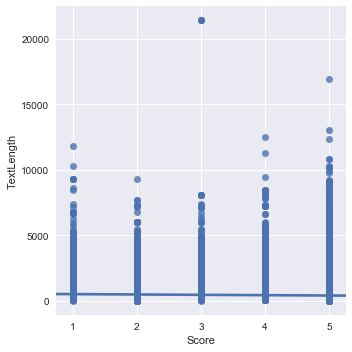

In [14]:
sns.lmplot(x='Score' , y='TextLength' , data=data , fit_reg=True)

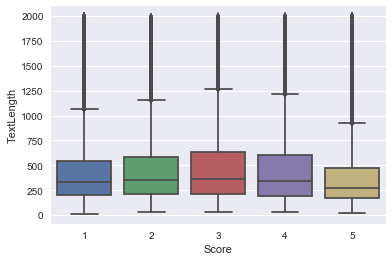

In [40]:
sns.boxplot(x='Score' , y='TextLength' , data=data[data.TextLength < 2000])

Interesting. comments with "3" Score tend to have a larger TextLength. why? i don't know maybe because their review was more realistic and they mentioned both positive and negative aspects of the product so they wrote more about the product.

In [16]:
data.HelpfulnessNumerator.unique()

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

so we have alot of unique numbers in HelpfulnessNumerator column. let's see their relation with user scores.

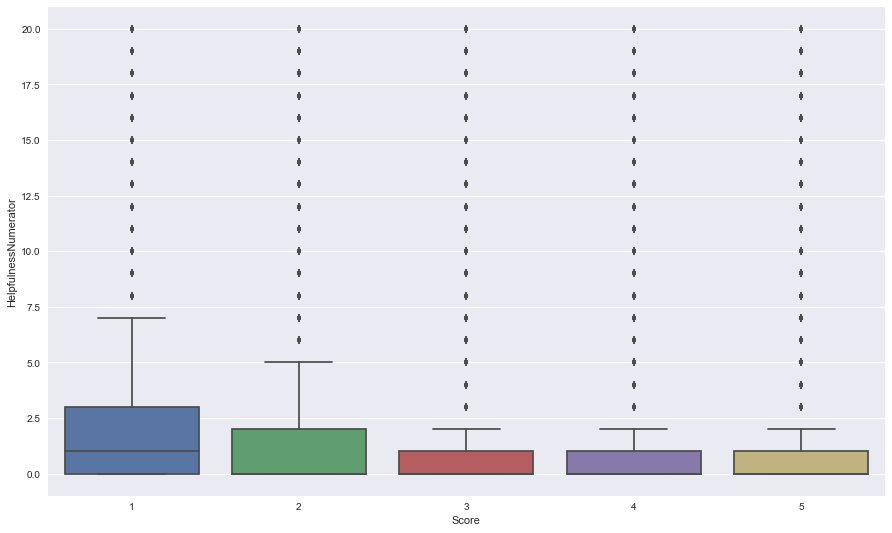

In [46]:
fig = plt.figure(figsize=(15,9))
sns.boxplot(x='Score' , y='HelpfulnessNumerator' , data=data[data.HelpfulnessNumerator <= 20])

It seems lower scores have higher HelpfulnessNumerator. maybe it's because people rate them more often (as they inform them of a bad product so they don't buy and waste their money on bad products.)

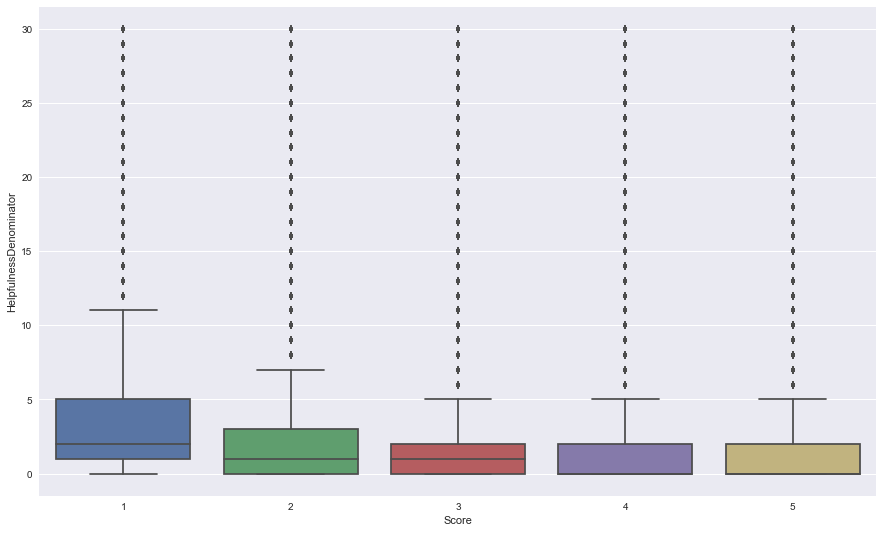

In [44]:
fig = plt.figure(figsize=(15,9))
sns.boxplot(x='Score' , y='HelpfulnessDenominator' , data=data[data.HelpfulnessDenominator <= 30])

Why comments on items with low scores seen more often? it's kinda odd because most of the comments are high-score (5) but comments with "1" score (which is the worst.) was seen more often. it really can hurt the business. because if negative comments see more often, it means bad products seen more often and most people didn't see good products in amazon so they didn't buy them.

ok, enough of EDA. now we transform scores to 0,1 to build a text classifier. we delete 3 scores (because they are kinda neutral and have no positive or negative effect.) and we change > 3 score to 1, and < 3 scores to 0.

In [19]:
data.shape

(568454, 11)

In [20]:
data = data[data.Score != 3]
data.shape

(525814, 11)

In [21]:
#data.Score[data.Score > 3] = 1
#data.Score[data.Score < 3] = 0
#data.loc[data.Score < 3 , 'Score'] = 0
data.Score.unique()

array([5, 1, 4, 2], dtype=int64)

In [22]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,TextLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140
